## Import initial python packages

In [289]:
# importing packages
import utils
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

print(f"pandas version: {pd.__version__}")
print(f"numpy version: {np.__version__}")
print(f"Seaborn version: {sns.__version__}")
# print(f"matplotlib version: {mp.__version__}")
print('All packages imported successfully!')


pandas version: 2.2.1
numpy version: 1.26.4
Seaborn version: 0.12.2
All packages imported successfully!


In [290]:
# Remove temporaly 
import warnings
# Displays each FutureWarning only once.
warnings.simplefilter("once", FutureWarning)

## Explore the dataset

In [291]:
pd.option_context('mode.use_inf_as_na', True)
# Original dataset was xlsx, convert to csv
df = pd.DataFrame(pd.read_excel("data/1688640705_hr_comma_sep.xlsx")) 
df.to_csv("data/hr_comma_sep.cvs", index=False)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [292]:
# Display basic statistics of the data
df.describe(include='all')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


In [293]:
# Checking columns / rows dimensions & types
columns = list(df.columns)
dimensions = df.shape
print(
    f"Dimensions {dimensions} Data contains {dimensions[0]} rows and {dimensions[1]} columns"
)
print(f"Columns are {list(df.columns)}\n")
print(f"Dataset type: \n{df.dtypes}")

Dimensions (14999, 10) Data contains 14999 rows and 10 columns
Columns are ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'sales', 'salary']

Dataset type: 
satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object


##  1. Perform data quality checks by checking for missing values, if any

In [294]:
# Check for missing values 
print("df.info() \n")
print(f"{df.info()} \n ")

df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None 
 


In [295]:
print("Check for isnull() \n")
print(f"{df.isnull().sum()}")

Check for isnull() 

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64


__Observation__:

- There are no Null rows in the dataset.

##  2. Understand what factors contributed most to employee turnover by EDA

### Draw a heatmap of the Correlation Matrix between all numerical features/columns in the data

In [297]:
# Separate categorical and numerical variables
categorical_vars = columns[-2:] # # Remove ['sales', 'salary']
numeric_vars = df.drop(columns=categorical_vars).columns
# numeric_vars = df.select_dtypes(include=['float64', 'int64']).columns

# Calculating a Correlation Matrix with Pandas
corr_matrix = df[numeric_vars].corr().round(2)
corr_matrix

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.00,0.11,-0.14,-0.02,-0.10,0.06,-0.39,0.03
last_evaluation,0.11,1.00,0.35,0.34,0.13,-0.01,0.01,-0.01
number_project,-0.14,0.35,1.00,0.42,0.20,-0.00,0.02,-0.01
average_montly_hours,-0.02,0.34,0.42,1.00,0.13,-0.01,0.07,-0.00
time_spend_company,-0.10,0.13,0.20,0.13,1.00,0.00,0.14,0.07
Work_accident,0.06,-0.01,-0.00,-0.01,0.00,1.00,-0.15,0.04
left,-0.39,0.01,0.02,0.07,0.14,-0.15,1.00,-0.06
promotion_last_5years,0.03,-0.01,-0.01,-0.00,0.07,0.04,-0.06,1.00


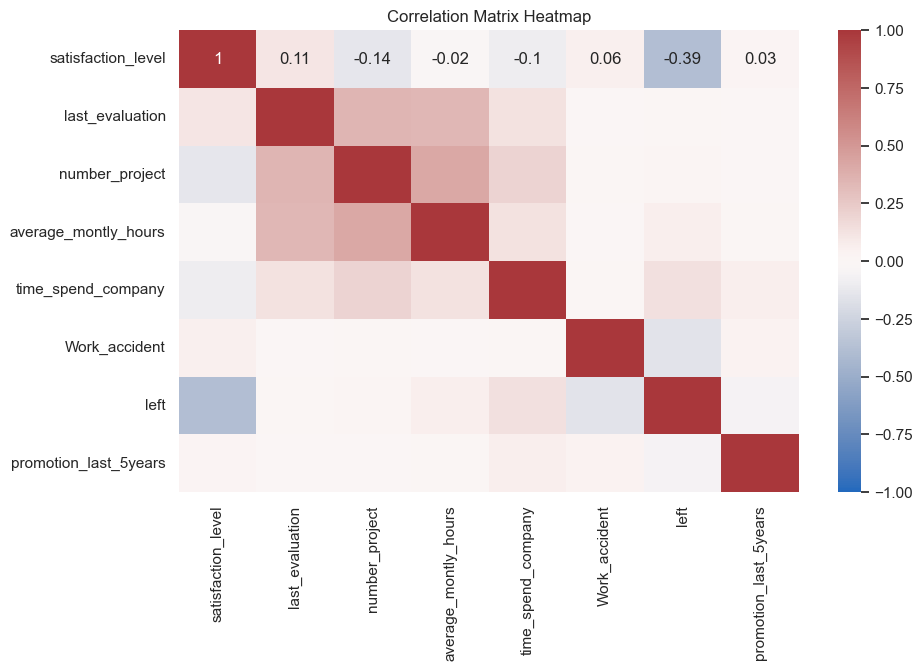

In [298]:
# Visualizing a Pandas Correlation Matrix Using Seaborn
# sns.heatmap(matrix, annot=True,cmap='vlag')
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.title('Correlation Matrix Heatmap')
plt.show()

/opt/anaconda3/envs/AIMLbootcamp/lib/python3.10/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


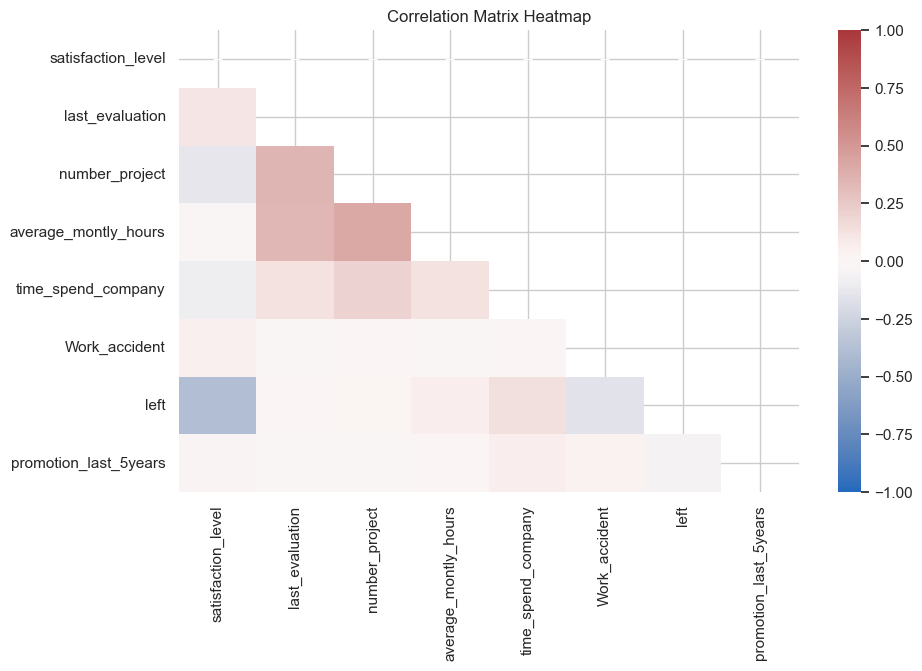

In [299]:
# show the bottom half of our visualization
# triu() function creates a triangle of a matrix.
plt.figure(figsize=(10, 6))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
plt.title('Correlation Matrix Heatmap')
plt.show()

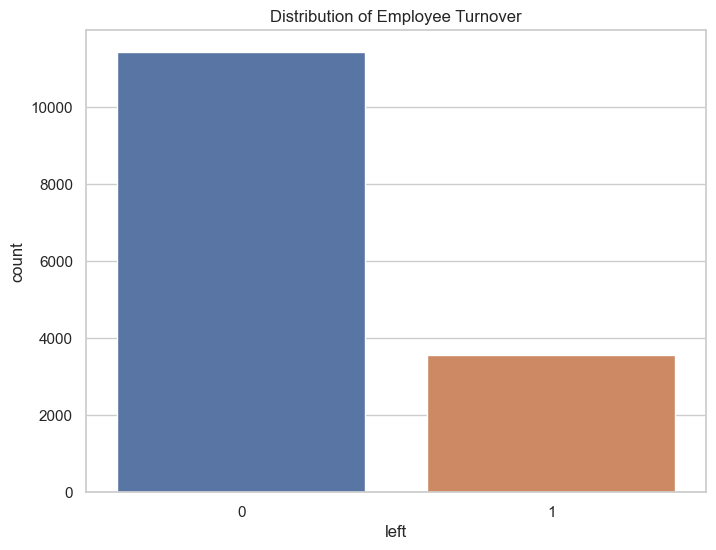

left
0    11428
1     3571
Name: count, dtype: int64

In [300]:
# Distribution of target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='left', data=df)
plt.title('Distribution of Employee Turnover')
plt.show()

# features = ['satisfaction_level', 'last_evaluation', 'average_montly_hours']
# show_turnover = False
# for feature in features:
#     utils.histplot_employee_kde_by(feature, df, show_turnover )
df.left.value_counts()

### Draw distributions plot of employees

In [303]:
# Set the esthetic style of the plots
sns.set_theme(style="whitegrid")
# First, check for inf before drawing distributions
# ds = df1.isin([np.inf, -np.inf])
# print(ds) 
df1 = df[numeric_vars] 
print("Printing the count of infinity values \n") 
count = np.isinf(df1).values.sum() 
print("DF contains " + str(count) + " infinite values") 
c_inf = np.isinf(df1['satisfaction_level']).values.sum() 
print("Feature 'satisfaction_level' contains " + str(c_inf) + " infinite values") 

df1 = df1.replace([np.inf, -np.inf], np.nan)
c_na = df1['satisfaction_level'].isna().sum()
print("Feature 'satisfaction_level' contains " + str(c_na) + " NaN values") 

df = df.replace([np.inf, -np.inf], np.nan)

Printing the count of infinity values 

DF contains 0 infinite values
Feature 'satisfaction_level' contains 0 infinite values
Feature 'satisfaction_level' contains 0 NaN values


In [ ]:
# fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# sns.histplot(df['satisfaction_level'], kde=True, ax=axes[0])
# axes[0].set_title('Employee Satisfaction Distribution')

# sns.histplot(df['last_evaluation'], kde=True, ax=axes[1])
# axes[1].set_title('Employee Evaluation Distribution')

# sns.histplot(df['average_montly_hours'], kde=True, ax=axes[2])
# axes[2].set_title('Employee Average Monthly Hours Distribution')

# plt.tight_layout()
# plt.show()

/opt/anaconda3/envs/AIMLbootcamp/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


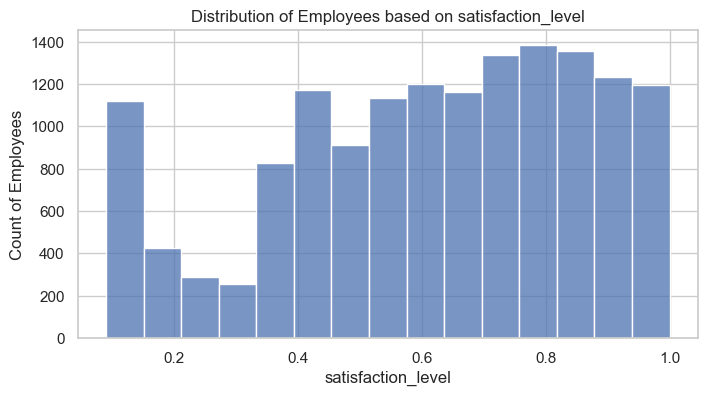

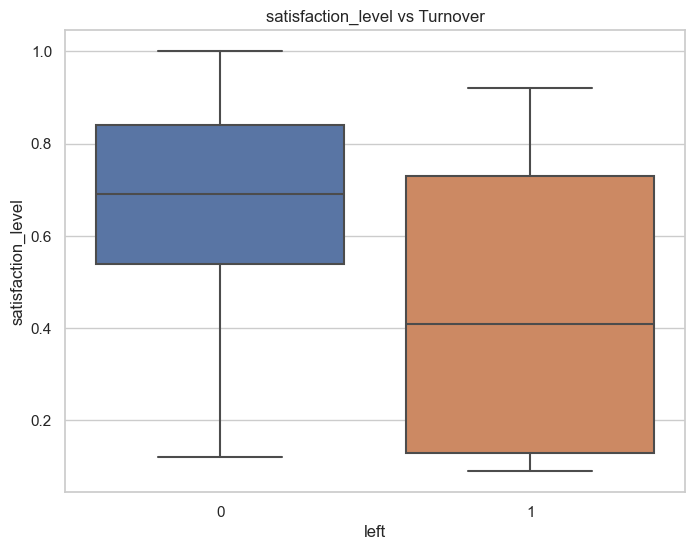

In [304]:
# Box plots for numerical features
utils.histplot_employee_kde_by('satisfaction_level', df, False, False)

# Box plots for numerical features
utils.box_plots_for('satisfaction_level', df)

In [305]:
utils.percentages_turnover_by('satisfaction_level', df)

Employee's turnover % based on satisfaction_level
--------------------------------------------------
   left satisfaction_level
0     0            66.68 %
1     1            44.01 %


__Observations__

We can observe that the satisfaction level of employes is slightly high (66.7%).


Adding  KDE overlay to highlight the underlying distribution pattern.
 
The following plots show the frequency distribution of:  

- Employee Satisfaction
- Employee Evaluation
- Employee Average Monthly Hours


/opt/anaconda3/envs/AIMLbootcamp/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/AIMLbootcamp/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/AIMLbootcamp/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


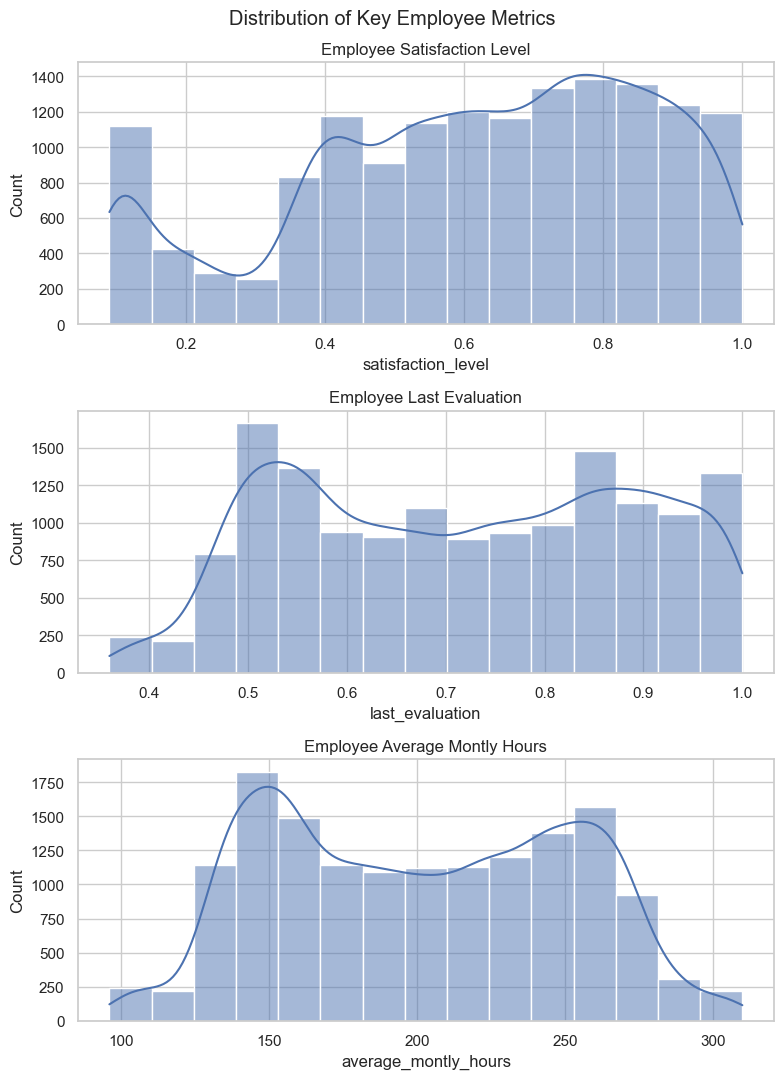

In [308]:
# Plot target features distribution pattern
target_vars = ['satisfaction_level', 'last_evaluation', 'average_montly_hours']
def subplots_histplot_employee_by(features):
  # Set up the plot
  num_axs = len(features)
  fig, axs = plt.subplots(num_axs, 1, figsize=(8, 11))
  fig.suptitle('Distribution of Key Employee Metrics')

  for i, feature in enumerate(features):
    sns.histplot(data=df, x=feature, kde=True, ax=axs[i], bins=15)
    feature_name = " ".join([word.capitalize() for word in feature.split("_")])
    axs[i].set_title(f'Employee {feature_name}')
    feature_name = " "

  plt.tight_layout()
  plt.show()

subplots_histplot_employee_by(target_vars)


__Observations__

- Satisfaction level of the employees is high (between 0.7 & 0.9). This could indicate that general speaking employees are happy at their jobs.

- There is a significant number of employees with evaluations around 0.5 and another group with evaluations between 0.85 and 1. Evaluations tend to cluster around those two values. Very high or very low scores might be associated with turnover. 

- The distribution of employees based on avg monthly hours,  shows a significant number of employees with an avg betweem 150 and aprox 260 hours per month. Extremely high hours might indicate overwork and potential burnout.

###  Draw the bar plot of the Employee Project Count of both employees who left and stayed in the organization

In [309]:
## Based on feature 'number_project'
# Calculate percentages for each project count
project_counts = df.groupby(['number_project', 'left']).size().unstack()
project_percentages = project_counts.div(project_counts.sum(axis=1), axis=0) * 100
# project_percentages_1 =  df.groupby(['number_project'])['left'].mean().apply(lambda x: '{:,.2f} %'.format(x * 100)).reset_index()
print("Percentage of employees who left for each project count:")
project_turnover_df = project_percentages.reset_index(names= 'project count').rename(columns={0: 'stayed', 1: 'left'})
project_turnover_df['stayed'] = project_turnover_df['stayed'].apply(lambda x: '{:,.2f} %'.format(x))
project_turnover_df['left'] = project_turnover_df['left'].apply(lambda x: '{:,.2f} %'.format(x))
project_turnover_df.set_index('project count')

Percentage of employees who left for each project count:


left,stayed,left
project count,,
2,34.38 %,65.62 %
3,98.22 %,1.78 %
4,90.63 %,9.37 %
5,77.83 %,22.17 %
6,44.21 %,55.79 %
7,nan %,100.00 %


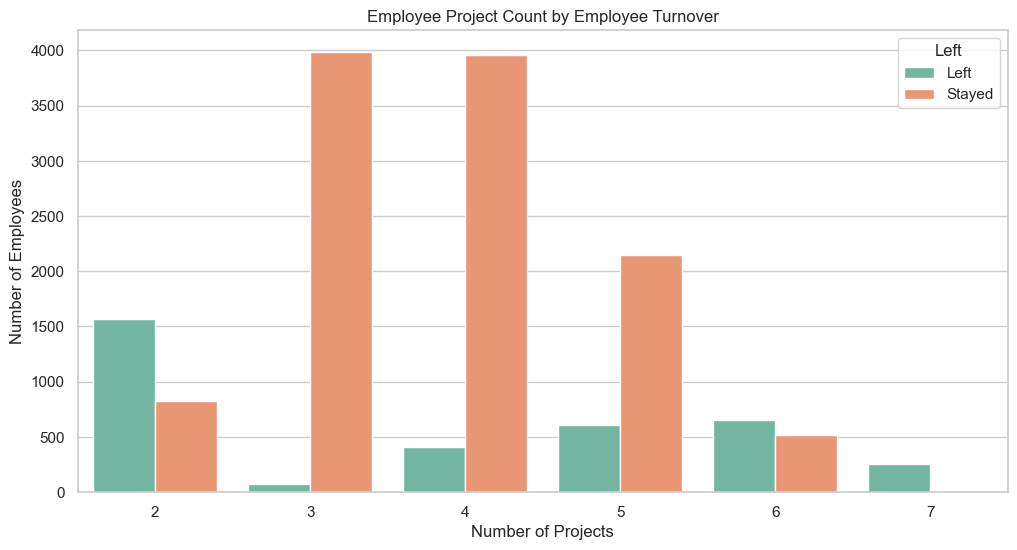

In [310]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure the 'left' column is treated as a str variable
df1['left'] = df1['left'].astype('str')

# Plot the bar plot side to side of Employee Project Count with respect to employee turnover
plt.figure(figsize=(12, 6))
sns.countplot(data=df1, x='number_project', hue='left', palette='Set2')
plt.title('Employee Project Count by Employee Turnover')
plt.xlabel('Number of Projects')
plt.ylabel('Number of Employees')
plt.legend(title='Left', loc='upper right', labels=['Left', 'Stayed'])
plt.show()

Categorical View Side by Side
--------------------------------------------------


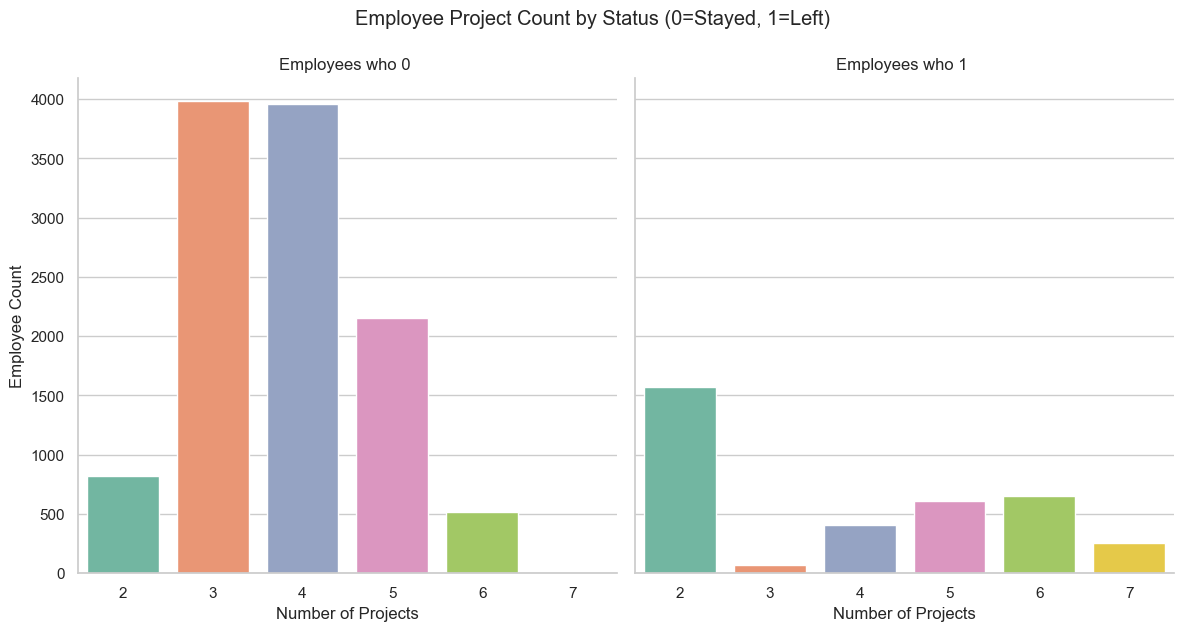

In [312]:
print("Categorical View Side by Side")
print("-"*50)
# Create a categorical plot (catplot) as a bar plot
g = sns.catplot(x='number_project', col='left', kind='count', data=df, palette='Set2', height=6, aspect=1)
g.set_axis_labels('Number of Projects', 'Employee Count')
g.set_titles('Employees who {col_name} ')
g.figure.suptitle('Employee Project Count by Status (0=Stayed, 1=Left)', y=1.05)  # Adjust the main title and its position
plt.show()

####  Explore other employees who stayed and left based on other features 

/opt/anaconda3/envs/AIMLbootcamp/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/AIMLbootcamp/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/anaconda3/envs/AIMLbootcamp/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


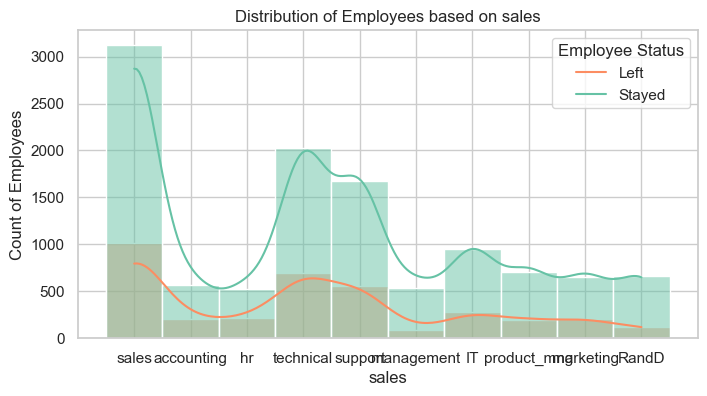

/opt/anaconda3/envs/AIMLbootcamp/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/AIMLbootcamp/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/anaconda3/envs/AIMLbootcamp/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


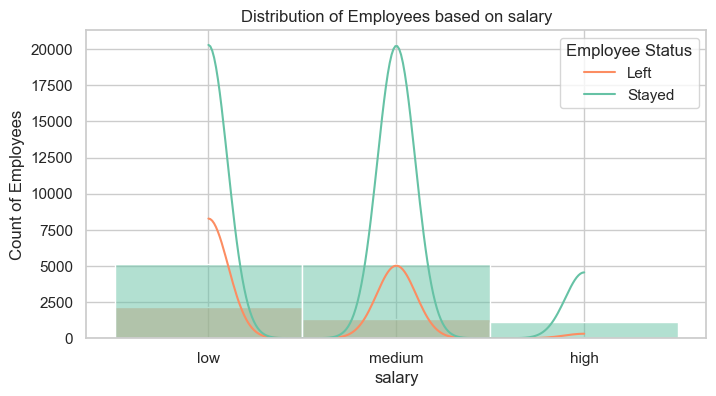

In [313]:
## Plot relationship between numerical features and turnover
## Distribution of Numerical Features and turnover
show_turnover = True
# for feature in target_vars:
#   utils.histplot_employee_kde_by(feature,df,show_turnover )

## Plot categorical features and turnover
categorical_vars = columns[-2:]
for feature in categorical_vars:
    utils.histplot_employee_kde_by(feature,df,show_turnover )
 

__Observations__

Inferences from the plots:


It allow us to observe how the distribution of projects is spread among those who left the organization compared to those who stayed.

Employees handling medium number of projects (between 3 and 5 projects) seem to have a lower turnover (stayed), indicating ideal workload for employees. Employees with very few projects (e.g., 2 or 3)  it might indicate underutilization or lack of engagement.

It seems that the extreme have higher turnover. Employees handling fewer projects (2), or handling too many projects (between 5 and 7) have higher turnover.

## 3. Perform clustering of employees who left based on their satisfaction and evaluation

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

print('All packages for clustering imported successfully!')

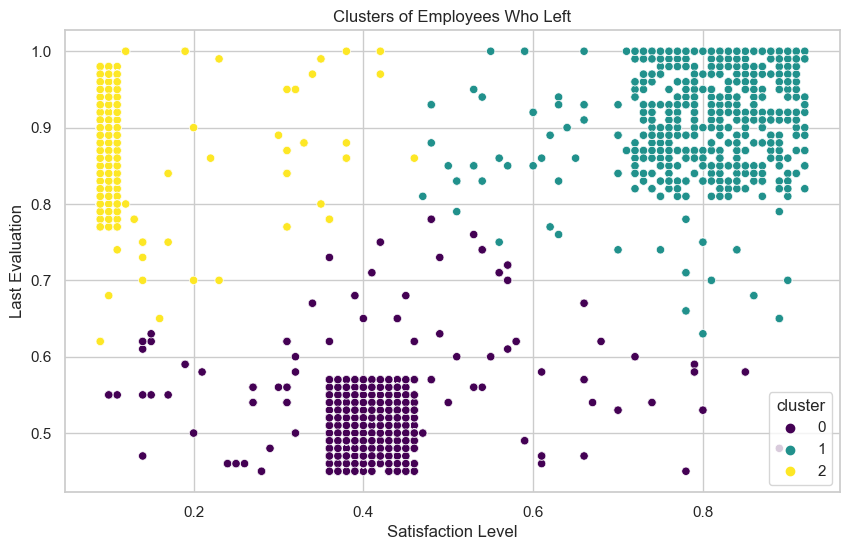

In [314]:
# Filter the dataset for employees who left and select relevant columns
left_employees_data = df[df['left'] == 1]

left_employees = left_employees_data .loc[:, ('satisfaction_level', 'last_evaluation')]

# Standardize the data
scaler = StandardScaler()
left_employees_scaled = scaler.fit_transform(left_employees)

# # Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
left_employees['cluster'] = kmeans.fit_predict(left_employees_scaled)

# # Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='satisfaction_level', y='last_evaluation', hue='cluster', data=left_employees, palette='viridis')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.title('Clusters of Employees Who Left')
plt.show()

__Observations__
- Cluster 0 (Purple):  Employees had low satisfaction and low evaluation score, which could mean that they problably left because they weren't happy with their work and felt undervalued.
- Cluster 1 (Green): Employees had high satisfaction and high evaluation scores but they probably chose to leave for reasons other than dissatisfaction or a lack of recognition (e.g. personal reasons)
- Cluster 2 (Yellow): Employees had high evaluation but lower satisfaction scores. It suggests that employees are high performers based on their evaluations but are very dissatisfied with their jobs. These employees might be high performers who feel their efforts are not recognized or rewarded adequately.



## 4. Handle the left Class Imbalance using the SMOTE technique

<Axes: ylabel='sales'>

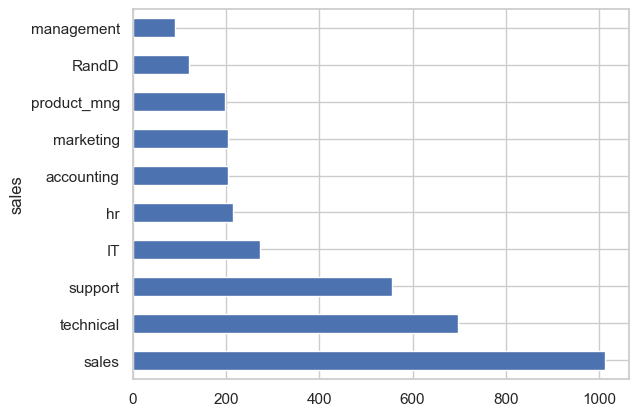

In [317]:
# Check imbalance first
left_employees_data.sales.value_counts().plot.barh()

<Axes: ylabel='salary'>

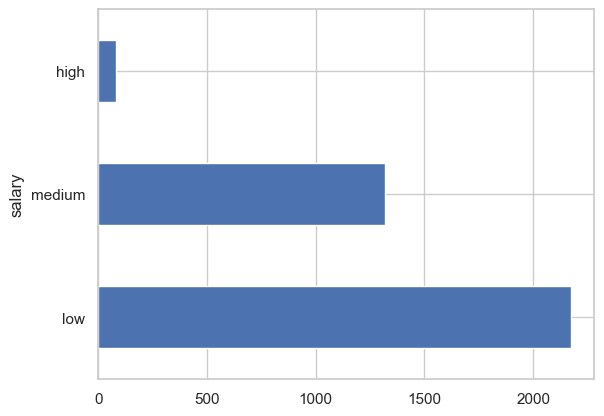

In [318]:
# Check imbalance
left_employees_data.salary.value_counts().plot.barh()

In [319]:
sales_df = left_employees_data[left_employees_data.sales == "sales"]
technical_df = left_employees_data[left_employees_data.sales == "technical"]
support_df = left_employees_data[left_employees_data.sales == "support"]
IT_df = left_employees_data[left_employees_data.sales == "IT"]
hr_df = left_employees_data[left_employees_data.sales == "hr"]
accounting_df = left_employees_data[left_employees_data.sales == "accounting"]
marketing_df = left_employees_data[left_employees_data.sales == "marketing"]
product_mng_df = left_employees_data[left_employees_data.sales == "product_mng"]
RandD_mng_df = left_employees_data[left_employees_data.sales == "RandD"]
management_df = left_employees_data[left_employees_data.sales == "management"]

print(f'sales_df: {sales_df.shape}')
print(f'technical_df: {technical_df.shape}')
print(f'support_df: {support_df.shape}')
print(f'IT_df: {IT_df.shape}')
print(f'hr_df: {hr_df.shape}')
print(f'accounting_df: {accounting_df.shape}')
print(f'marketing_df: {marketing_df.shape}')
print(f'product_mng_df: {product_mng_df.shape}')
print(f'RandD_mng_df: {RandD_mng_df.shape}')
print(f'management_df: {management_df.shape}')

sales_df: (1014, 10)
technical_df: (697, 10)
support_df: (555, 10)
IT_df: (273, 10)
hr_df: (215, 10)
accounting_df: (204, 10)
marketing_df: (203, 10)
product_mng_df: (198, 10)
RandD_mng_df: (121, 10)
management_df: (91, 10)


### Pre-process the data by converting categorical columns to numerical columns

In [324]:
# Separate features and target
X = df.drop('left', axis=1)
y = df['left']

# # Separate categorical and numerical variables
categorical_vars = ['sales', 'salary']
numeric_vars = X.drop(columns=categorical_vars).columns

# # Apply get_dummies to categorical variables
X_categorical = pd.get_dummies(X[categorical_vars], drop_first=True)

# # Combine categorical and numeric variables
X_combined = pd.concat([X[numeric_vars], X_categorical], axis=1)
# # Print the shape of the processed dataset
print("Shape of processed dataset:", X_combined.shape)

Shape of processed dataset: (14999, 18)


### Stratified split of the dataset to train and test and upsample the train dataset using the SMOTE technique 


In [325]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

print('All packages for handling Class Imbalance imported successfully!')

All packages for handling Class Imbalance imported successfully!


In [326]:
# Stratified split of the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, stratify=y, random_state=123)

print("Shape of training set X_train:", X_train.shape)
print("Shape of test set X_test:", X_test.shape)

print("Shape of training set y_train:", y_train.shape)
print("Shape of test set y_test:", y_test.shape)

# Print class distribution before SMOTE
print("\nClass distribution before SMOTE:")
print(y_train.value_counts(normalize=True))

# Upsample the train dataset using SMOTE
smote = SMOTE(random_state=123)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Print class distribution after SMOTE
print("\nClass distribution after SMOTE:")
print(pd.Series(y_train_resampled).value_counts(normalize=True))

print("\nShape of training set after SMOTE:", X_train_resampled.shape)

# Standardize the features
scaler = StandardScaler()

# Fit and transform the training data
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Now we use X_train_res_scaled and y_train_res for training machine learning models
print(f"Shape of training data after Scaler (X_train_resampled_scaled): {X_train_resampled_scaled.shape}")
print(f"Shape of testing data (X_test_scaled): {X_test_scaled.shape}")

Shape of training set X_train: (11999, 18)
Shape of test set X_test: (3000, 18)
Shape of training set y_train: (11999,)
Shape of test set y_test: (3000,)

Class distribution before SMOTE:
left
0    0.761897
1    0.238103
Name: proportion, dtype: float64

Class distribution after SMOTE:
left
0    0.5
1    0.5
Name: proportion, dtype: float64

Shape of training set after SMOTE: (18284, 18)
Shape of training data after Scaler (X_train_resampled_scaled): (18284, 18)
Shape of testing data (X_test_scaled): (3000, 18)


## 5. Performing  5-fold cross-validation model training and evaluate performance


In [377]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import make_scorer, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import utils

print('All packages for  5-fold cross-validatione imported successfully!')

All packages for  5-fold cross-validatione imported successfully!


### Train a Logistic Regression model and apply 5-fold cross-validation

Train Logistic Regression model, with 5 fold cross-validation using ROC AUC scoring metric
----------------------------------------------------------------------------------------------------
Cross-validation Mean ROC AUC: 0.7951 (+/- 0.0668)
Make predictions on the training data
--------------------------------------------------------------------------------
ROC AUC on the test set: 0.8151


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.77      0.83      2286
           1       0.51      0.74      0.60       714

    accuracy                           0.77      3000
   macro avg       0.71      0.76      0.72      3000
weighted avg       0.81      0.77      0.78      3000



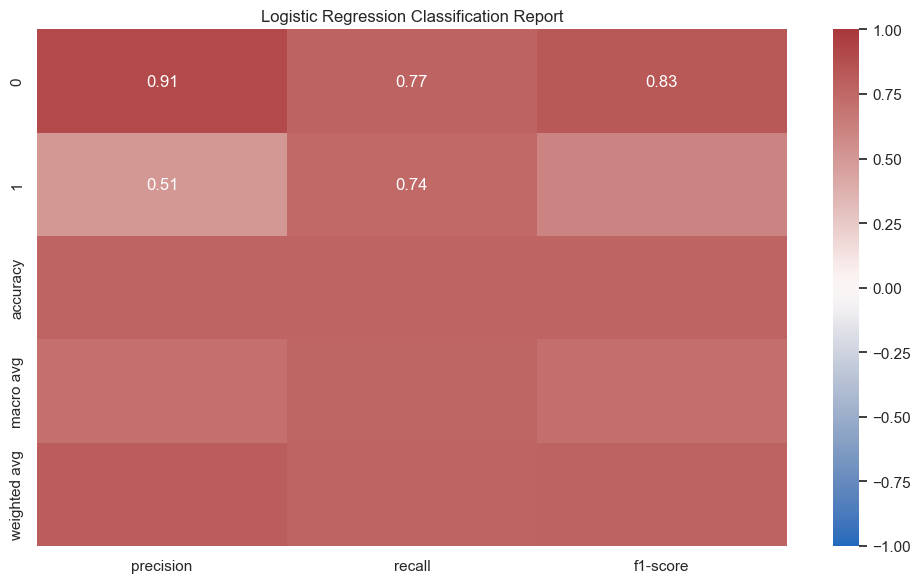



Confusion Matrix:


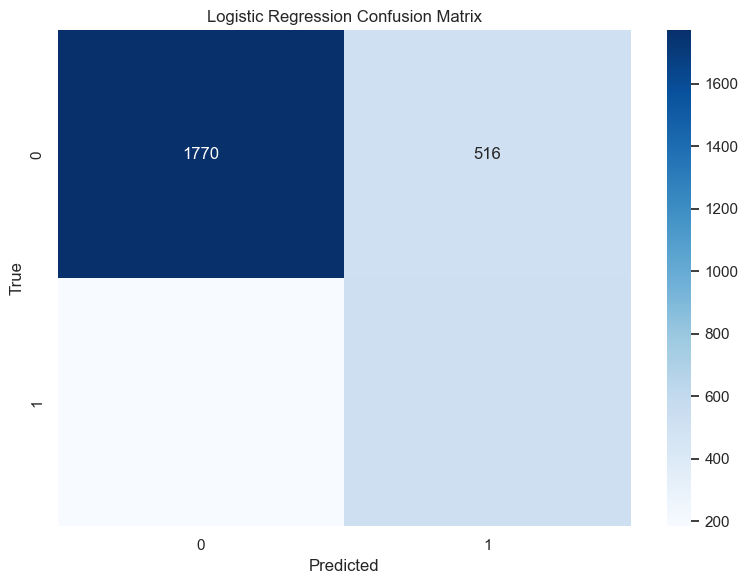

In [349]:
print("Train Logistic Regression model, with 5 fold cross-validation using ROC AUC scoring metric")
print("-" * 100)
# Initialize a Logistic Regression model and apply 5-fold cross-validation
log_reg = LogisticRegression(random_state=123)

# # Define scoring metric
scoring = make_scorer(roc_auc_score)

# Perform 5-fold cross-validation for Logistic Regression
# log_reg_scores = cross_val_score(log_reg, X_train_resampled_scaled, y_train_resampled, cv=5, scoring='roc_auc')
log_reg_scores = cross_val_score(log_reg, X_train_resampled_scaled, y_train_resampled, cv=5, scoring=scoring)

# print("Logistic Regression ROC AUC Scores:", log_reg_scores)
print(f"Cross-validation Mean ROC AUC: {log_reg_scores.mean():.4f} (+/- {log_reg_scores.std() * 2:.4f})")

print("Make predictions on the training data")
print("-" * 80)
log_reg.fit(X_train_resampled_scaled, y_train_resampled)
y_pred = log_reg.predict(X_test_scaled)

y_pred_probas = log_reg.predict_proba(X_test_scaled)# Shape: (n_samples, 2)
y_pred_proba = y_pred_probas[:, 1]  # Shape: (n_samples,) positve class probas
# print(f"y_test shape: {y_test.shape} y_test_pred shape: {y_pred.shape}")

# y_train_resampled
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC on the test set: {roc_auc:.4f}\n")
# # Generate classification report based on the test set predicted
report = classification_report(y_test, y_pred, output_dict=True) 
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
# # Plot classification
utils.plot_classification_report(report, "Logistic Regression Classification Report")
print("\n")

## Building the matrix first by using y_test_pred 
print("Confusion Matrix:")
# Plot confusion matrix
utils.plot_confusion_matrix(y_test, y_pred, "Logistic Regression" )

Cross-Validation Accuracy (using cross_val_predict): 0.5211

Classification Report for Training Data with 5-Fold Cross-Validation:
              precision    recall  f1-score   support

           0       0.81      0.77      0.79      9142
           1       0.78      0.82      0.80      9142

    accuracy                           0.80     18284
   macro avg       0.80      0.80      0.80     18284
weighted avg       0.80      0.80      0.80     18284



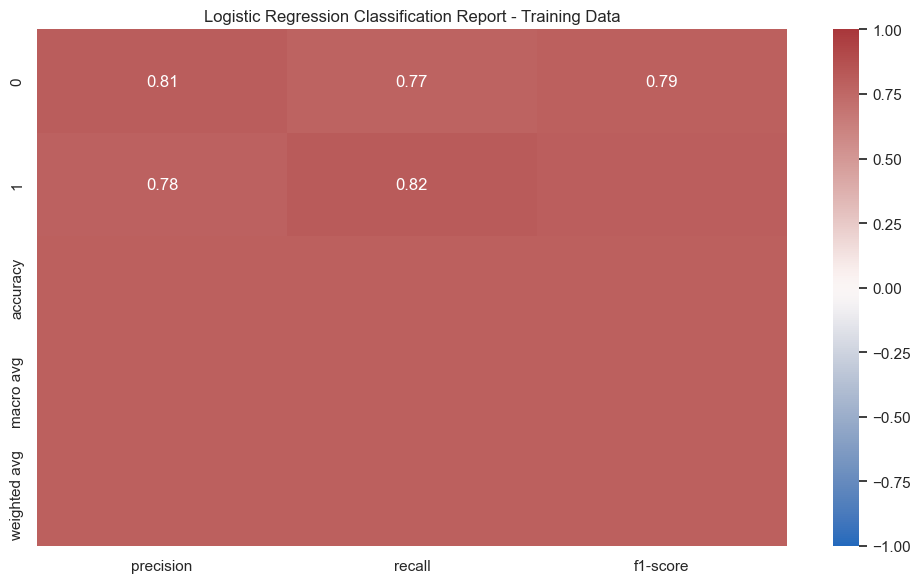

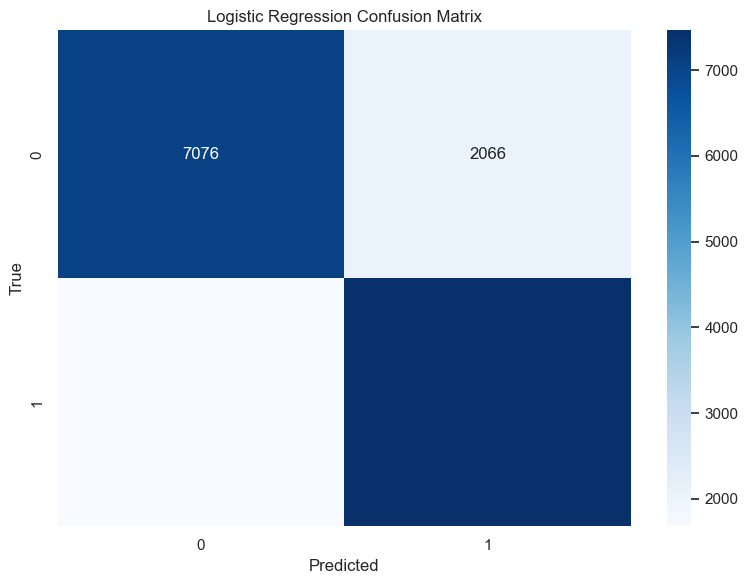

In [350]:
# Cross-validation functions like cross_val_predict and cross_val_score internally handle the fitting process for each fold. 
# They split the data, train the model on the training set, and evaluate it on the test set for each fold.
y_train_predicted = cross_val_predict(log_reg, X_train_resampled_scaled, y_train_resampled, cv=5)
print(f"Cross-Validation Accuracy (using cross_val_predict): {y_train_predicted.mean():.4f}\n")
# print(f"X_train_resampled_scaled shape: {X_train_resampled_scaled.shape} - y_train_resampled shape: {y_train_resampled.shape}")

# # Generate classification report based on y_train_predicted (cross_val_predict)
report = classification_report(y_train_resampled, y_train_predicted, output_dict=True)
# print(f"report based on the train set predicted: {report.keys()}")
print("Classification Report for Training Data with 5-Fold Cross-Validation:")
print(classification_report(y_train_resampled, y_train_predicted))

# # Plot classification
utils.plot_classification_report(report, "Logistic Regression Classification Report - Training Data")

# Plot confusion matrix
utils.plot_confusion_matrix(y_train_resampled, y_train_predicted, "Logistic Regression")


### Train Models ALL clasification models 

In [478]:
# # LogisticRegression, RandomForestClassifier, and GradientBoostingClassifier are clasification models
# # if If we don't specify the scoring parameter, cross_val_score() will default to using accuracy as the evaluation metric.
def train_and_evaluate(model, X, y, cv=5, scoring='accuracy'):
    # scores = cross_val_score(model, X, y, cv=cv, scoring='f1')
    scores = cross_val_score(model, X, y, cv=cv, scoring=scoring)
    # scores = cross_val_score(model, X, y, cv=cv)
    print(f"Cross-validation scores: {scores}")
    print(f"Mean: {scores.mean():.3f} (+/- {scores.std() * 2:.3f})")
    
    model.fit(X, y)
    y_pred = model.predict(X_test_scaled)

    print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')
    print(f'Precision: {precision_score(y_test, y_pred):.4f}')
    print(f'Recall: {recall_score(y_test, y_pred):.4f}')
    print(f'F1 Score: {f1_score(y_test, y_pred):.4f}')
    
    print("\nClassification Report:")
    # report = classification_report(y_test, y_pred, output_dict=True)
    # utils.plot_classification_report(report, "Classification Report")
    print(classification_report(y_test, y_pred))

# Define models
models = {
    'LogisticRegression': LogisticRegression(random_state=123),
    'RandomForest': RandomForestClassifier(random_state=123),
    'GradientBoosting': GradientBoostingClassifier(random_state=123)
}

# Train and evaluate models
for name, model in models.items():
  print(f"\n{name}:")
  train_and_evaluate(model, X_train_resampled_scaled, y_train_resampled)
  print("-"*100)


LogisticRegression:
Cross-validation scores: [0.73858354 0.77577249 0.81378179 0.8200711  0.827407  ]
Mean: 0.795 (+/- 0.067)
Accuracy: 0.7667
Precision: 0.5067
Recall: 0.7423
F1 Score: 0.6023

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.77      0.83      2286
           1       0.51      0.74      0.60       714

    accuracy                           0.77      3000
   macro avg       0.71      0.76      0.72      3000
weighted avg       0.81      0.77      0.78      3000

----------------------------------------------------------------------------------------------------

RandomForest:
Cross-validation scores: [0.97949139 0.98249932 0.98496035 0.98578069 0.98769147]
Mean: 0.984 (+/- 0.006)
Accuracy: 0.9893
Precision: 0.9776
Recall: 0.9776
F1 Score: 0.9776

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2286
           1       0.98      0.98

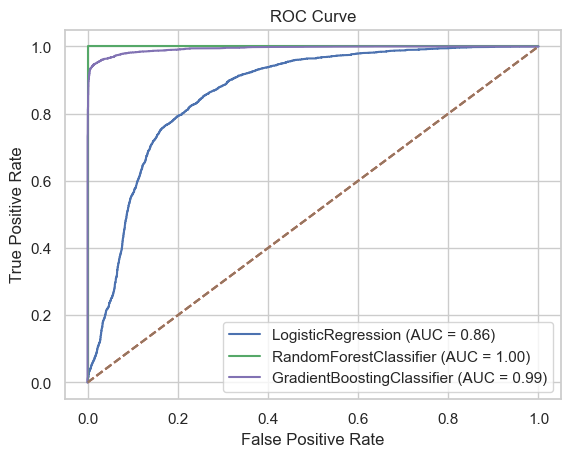

In [469]:
def plot_roc_curve(model, X, y):
    y_pred_proba = model.predict_proba(X)[:, 1]
    fpr, tpr, _ = roc_curve(y, y_pred_proba)
    auc = roc_auc_score(y, y_pred_proba)
    
    plt.plot(fpr, tpr, label=f'{model.__class__.__name__} (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()


# plt.figure(figsize=(10, 8))
plot_roc_curve(models['LogisticRegression'], X_train_resampled_scaled, y_train_resampled)
plot_roc_curve(models['RandomForest'], X_train_resampled_scaled, y_train_resampled)
plot_roc_curve(models['GradientBoosting'], X_train_resampled_scaled, y_train_resampled)


Confusion Matrix for LogisticRegression:
[[1770  516]
 [ 184  530]]


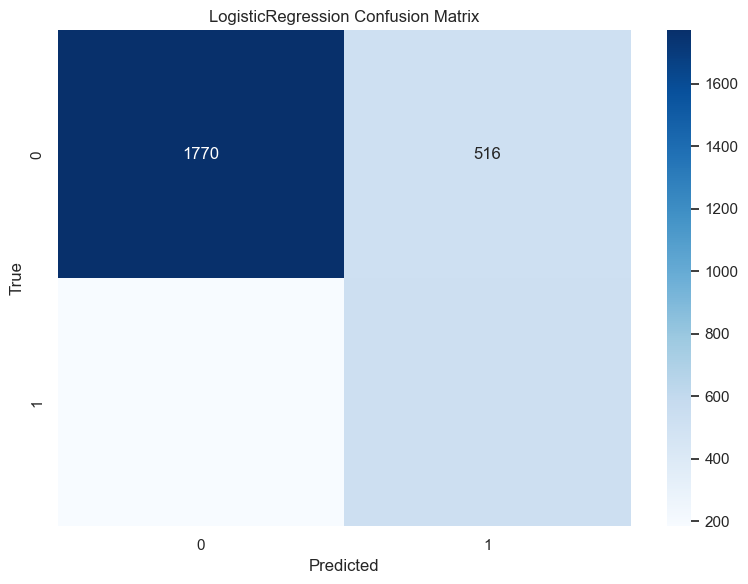


Confusion Matrix for RandomForest:
[[2270   16]
 [  16  698]]


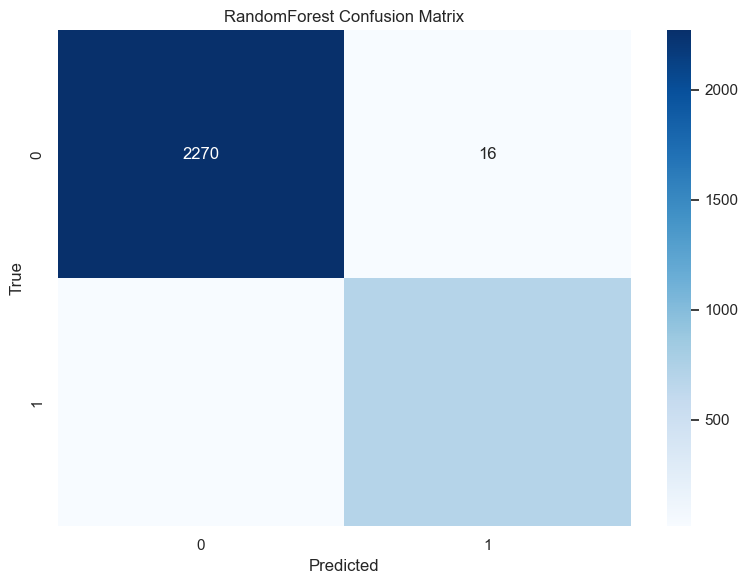


Confusion Matrix for GradientBoosting:
[[2228   58]
 [  50  664]]


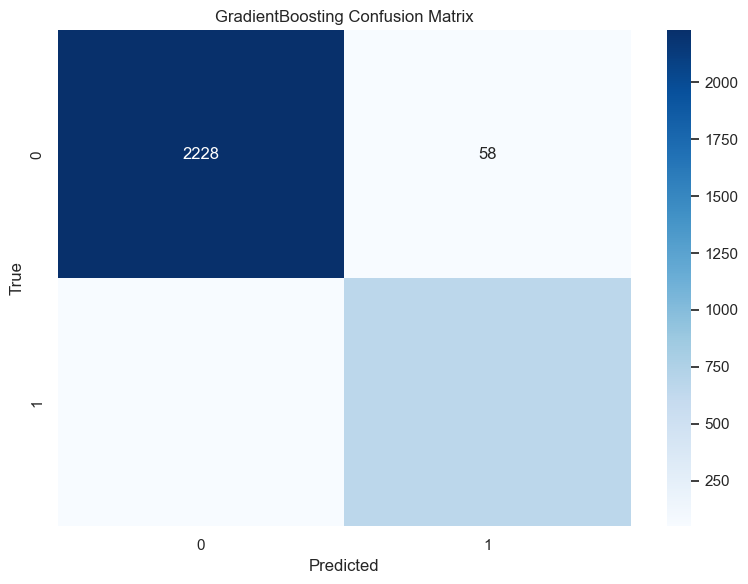

In [470]:
for name, model in models.items():
    print(f"\nConfusion Matrix for {name}:")
    y_pred = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    # Plot confusion matrix using ConfusionMatrixDisplay
    # cm_display = ConfusionMatrixDisplay.from_estimator(model, X_test_scaled, y_test)
    # cm_display.ax_.set_title('Confusion Matrix')
    # plt.figure(figsize=(8, 6))
    # plt.show()
    # Plot confusion matrix
    utils.plot_confusion_matrix(y_test, y_pred, name)


## Using ConfusionMatrixDisplay.from_estimator which takes X_test_scaled


In [480]:
# It looks like it is the best one with scoring recall
train_and_evaluate(models['RandomForest'], X_train_resampled_scaled, y_train_resampled, cv=5, scoring="recall")
plot_roc_curve(models['RandomForest'], X_train_resampled_scaled, y_train_resampled)

In [481]:
# I chose this model because it's the one with scores   
best_model = models['RandomForest']

# Predict probabilities
y_pred_proba = best_model.predict_proba(X_test_scaled)[:, 1]

# Categorize employees into risk zones
def categorize_risk(probability):
    if probability < 0.2:
        return 'Safe Zone (Green)'
    elif probability < 0.6:
        return 'Low Risk Zone (Yellow)'
    elif probability < 0.9:
        return 'Medium Risk Zone (Orange)'
    else:
        return 'High Risk Zone (Red)'

risk_categories = [categorize_risk(p) for p in y_pred_proba]
#  Add risk categories to the test data
X_test_with_risk = X_test_scaled.copy()

# Note: after applying StandardScaler(), X_test becomes a numpy array so we need to
# create a new DataFrame with risk categories
risk_df = pd.DataFrame({
    'Probability': y_pred_proba,
    'Risk Category': risk_categories
})
# # Display distribution of risk categories
print(risk_df['Risk Category'].value_counts())
original_features = X_test.reset_index(drop=True)  # reset index to ensure alignment
risk_df = pd.concat([original_features, risk_df], axis=1)

## Now you can analyze based on original features and risk categories
print("\nSample of employees in different risk categories:")
# print(risk_df.groupby('Risk Category').first())

# # Suggest retention strategies
# print("\nRetention Strategies:")
print("Safe Zone (Green): Regular check-ins, ongoing training opportunities, recognitions and career development plans.")
print("Low Risk Zone (Yellow): Increased engagement activities, mentorship programs, and performance incentives.")
print("Medium Risk Zone (Orange): One-on-one meetings to address concerns, tailored retention plans, and potential role adjustments.")
print("High Risk Zone (Red): Immediate intervention, comprehensive benefits review, and personalized retention packages.")

# Analyzing average feature values for each risk category
print("\nAverage feature values by risk category:")
print(risk_df.groupby('Risk Category').mean())



Risk Category
Safe Zone (Green)            2161
High Risk Zone (Red)          653
Low Risk Zone (Yellow)        134
Medium Risk Zone (Orange)      52
Name: count, dtype: int64

Sample of employees in different risk categories:
Safe Zone (Green): Regular check-ins, ongoing training opportunities, recognitions and career development plans.
Low Risk Zone (Yellow): Increased engagement activities, mentorship programs, and performance incentives.
Medium Risk Zone (Orange): One-on-one meetings to address concerns, tailored retention plans, and potential role adjustments.
High Risk Zone (Red): Immediate intervention, comprehensive benefits review, and personalized retention packages.

Average feature values by risk category:
                           satisfaction_level  last_evaluation  \
Risk Category                                                    
High Risk Zone (Red)                 0.429847         0.721179   
Low Risk Zone (Yellow)               0.465597         0.769925   
Medium R